# CPSC222 - DA7 Google Trends Regression

Jonathan Smoley

December 9, 2021

In [1]:
# imported libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Data Collection, Cleaning, and Preparation
The data contained in the *multiTimeline.csv* file is related to a Google Trends search for the term **Suggs**. Similarly, the data contained in the *Gonzaga_search.csv* is related to another Google Trends search for **Gonzaga University**.

m: 1.0369887477084532 b: -1.8686152727732557 r: 0.9347299487526298


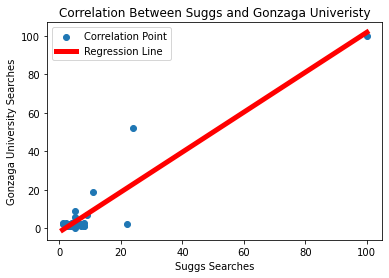

In [2]:
# read data
x = pd.read_csv("multiTimeline.csv")
y = pd.read_csv("Gonzaga_search.csv")

# clean data
header1 = x.index[0]
header2 = y.index[0]
x.drop(x.index[0], inplace = True)
y.drop(y.index[0], inplace = True)

x.replace('<1', 0, inplace = True)
y.replace('<1', 0, inplace = True) # handle 1 weird case

search_arr = []
gonzaga_arr = []
for arr in range(len(x.values.astype(int))):
    search_arr.append(x.values.astype(int)[arr][0])
    gonzaga_arr.append(y.values.astype(int)[arr][0])

# create/plot regression line
m, b, r, p, stderr = linregress(search_arr, gonzaga_arr)

print('m:', m, 'b:', b, 'r:', r)

# display scatter plot over regression line
plt.scatter(search_arr, gonzaga_arr, label = 'Correlation Point')
plt.plot([min(search_arr), max(search_arr)], [m*min(search_arr)+b, m*max(search_arr)+b],
    color = 'red', lw = 5, label = 'Regression Line')
plt.title("Correlation Between Suggs and Gonzaga Univeristy")
plt.xlabel("Suggs Searches")
plt.ylabel("Gonzaga University Searches")
plt.legend()
plt.show()

## Result
With a correlation coefficient (r) of ~0.935, there is a strong correlation between the search term *Suggs* and the search term *Gonzaga University*. This means the popularity of Suggs and Gonzaga Univeristy are closely related.